In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import sys
sys.path.append("..")   # add parent directory to Python path
import functions

D:\Documents\GitHub\ML_cardiac_prediction\lstm\..\functions.py:223: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f"D$_2$ vs log($\epsilon$) (D$_2$ plateau ≈ {plateau_average:.3f})")


In [3]:
voltage = functions.load_voltage('../data/tau_d_0.408_temporal_APD_step_4 (1).csv')
APD,DI,BCL = functions.get_APD_DI_BCL([voltage])

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(voltage.reshape(-1, 1))

In [5]:
window_size = 1000
prediction_size = 300
X = []
y = []

for i in range(window_size, len(scaled_data) - prediction_size):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i:i+prediction_size, 0])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [6]:
X_train.shape

(2960, 1000, 1)

In [7]:
y_train.shape

(2960, 300)

In [8]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')

D:\Anaconda\envs\lstm\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,shuffle=False )
model.save("lstm_from_1000_pred_300_batch_100.keras")

# later
from tensorflow import keras
restored = keras.models.load_model("my_model.keras")

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 53s 616ms/step - loss: 0.1279 - val_loss: 0.1175
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 584ms/step - loss: 0.1068 - val_loss: 0.1284
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 590ms/step - loss: 0.1056 - val_loss: 0.1177
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 588ms/step - loss: 0.1020 - val_loss: 0.1312
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 583ms/step - loss: 0.1026 - val_loss: 0.1251
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 581ms/step - loss: 0.1004 - val_loss: 0.1314
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 584ms/step - loss: 0.0996 - val_loss: 0.1327
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 587ms/step - loss: 0.1017 - val_loss: 0.1279
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 52s 621ms/step - loss: 0.0978 - val_loss: 0.1349
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 54s 646ms/step - loss: 0.1021 - val_loss: 0.1238
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 590ms/step - loss: 0.0993 - val_loss: 0.1237
Epoch 12/100
84/84 ━━━━━━━━━━━

84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 586ms/step - loss: 0.0884 - val_loss: 0.1266
Epoch 68/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 581ms/step - loss: 0.0909 - val_loss: 0.1109
Epoch 69/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 581ms/step - loss: 0.0868 - val_loss: 0.1215
Epoch 70/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 580ms/step - loss: 0.0883 - val_loss: 0.1159
Epoch 71/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 585ms/step - loss: 0.0875 - val_loss: 0.1163
Epoch 72/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 587ms/step - loss: 0.0863 - val_loss: 0.1163
Epoch 73/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 594ms/step - loss: 0.0845 - val_loss: 0.1168
Epoch 74/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 50s 600ms/step - loss: 0.0845 - val_loss: 0.1159
Epoch 75/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 51s 609ms/step - loss: 0.0963 - val_loss: 0.1201
Epoch 76/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 582ms/step - loss: 0.0887 - val_loss: 0.1339
Epoch 77/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 49s 586ms/step - loss: 0.0915 - val_loss: 0.1135
Epoch 78/100
84/84 ━━━━━━━━━━━━━━━

In [66]:
yhat = model.predict(X_test[:1], verbose=0)   # shape (1, 1000)
y_pred = scaler.inverse_transform(yhat.reshape(-1, 1)).ravel()  # if your scaler was fit on single-column data
y_true = scaler.inverse_transform(y_test[0].reshape(-1, 1)).ravel()


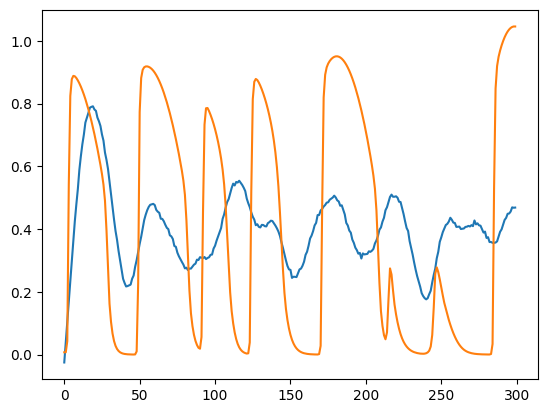

In [67]:
plt.plot(y_pred)
plt.plot(y_true)


In [26]:
x_cur = X_test[0]# shape (300, 1)

# Add batch dimension -> shape (1, 300, 1)
x_cur = np.expand_dims(x_cur, axis=0)

prediction_step = 500
prediction = []
for step in range(prediction_step):
    # Predict next 1 y value
    y_hat = model.predict(x_cur)
    y_val = y_hat[0, 0]
    prediction.append(y_val)
    
    x_cur[:, :-1, :] = x_cur[:, 1:, :]
    x_cur[:, -1, 0] = y_val   
    
preds = scaler.inverse_transform(np.array(prediction).reshape(-1, 1)).ravel()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━

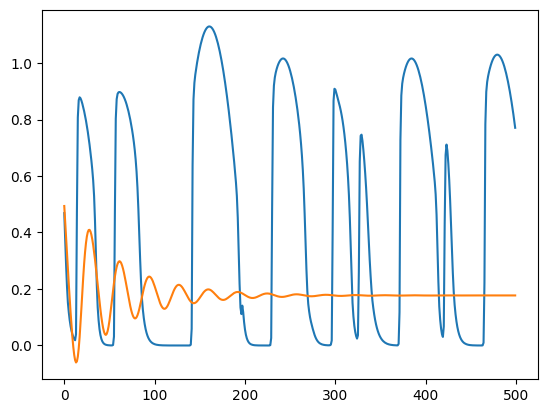

In [27]:
plt.plot(y_test[:500])
plt.plot(preds)

In [77]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 300, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 300, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 594,821 (2.27 MB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 396,548 (1.51 MB)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

def delay_embed(x, m=3, tau=1):
    """
    Time-delay embed a 1D array x into R^m with delay tau.
    Returns an array of shape (N - (m-1)*tau, m).
    """
    x = np.asarray(x).reshape(-1)
    N = x.size - (m - 1) * tau
    if N <= 0:
        raise ValueError("Series too short for given m and tau.")
    # columns: [x(t), x(t+tau), ..., x(t+(m-1)tau)]
    return np.column_stack([x[i:i+N] for i in range(0, m*tau, tau)])

def plot_phase_from_1d(x, m=3, tau=1, zscore=True, two_d=True):
    """
    Build embedding and draw phase portrait(s).
    - zscore: standardize each coordinate for nicer aspect.
    - two_d: also draw the 2D projection x(t) vs x(t+tau).
    """
    X = delay_embed(x, m=m, tau=tau)
    if zscore:
        X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-12)

    # 3D trajectory
    fig = plt.figure(figsize=(5, 5), dpi=200)
    ax = fig.add_subplot(projection='3d')
    ax.plot(X[:,0], X[:,1], X[:,2], linewidth=0.6, alpha=0.9)
    ax.set_xlabel('x(t)')
    ax.set_ylabel(f'x(t+{tau})')
    ax.set_zlabel(f'x(t+{2*tau})')
    ax.set_title(f'Time-delay embedding (m={m}, τ={tau})')
    ax.grid(False)

    # Optional: 2D projection like your panel style
    if two_d:
        fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=200)
        ax2.plot(X[:,0], X[:,1], linewidth=0.5, alpha=0.35)
        ax2.set_xlabel('x(t)')
        ax2.set_ylabel(f'x(t+{tau})')
        ax2.set_aspect('equal', 'box')
        ax2.set_title('2D projection')
        ax2.axis('off')  # clean look like the paper

    plt.show()

# --- Usage ---
# voltage is your 1D NumPy array of cardiac membrane potential samples
# plot_phase_from_1d(voltage, m=3, tau=1)


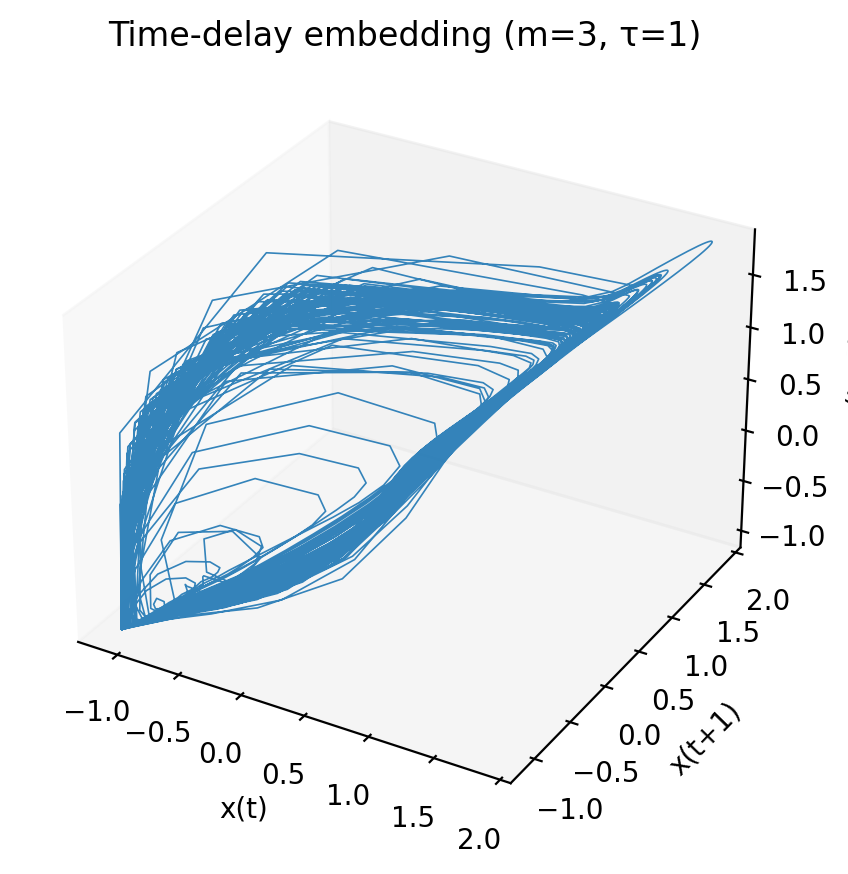

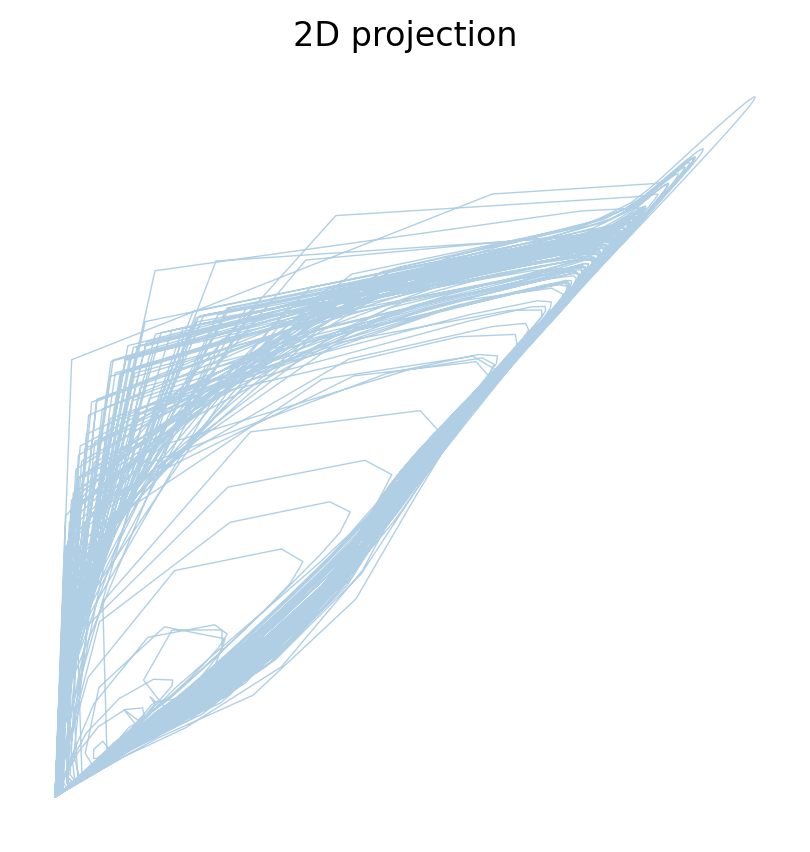

In [69]:
plot_phase_from_1d(voltage, m=3, tau=1)


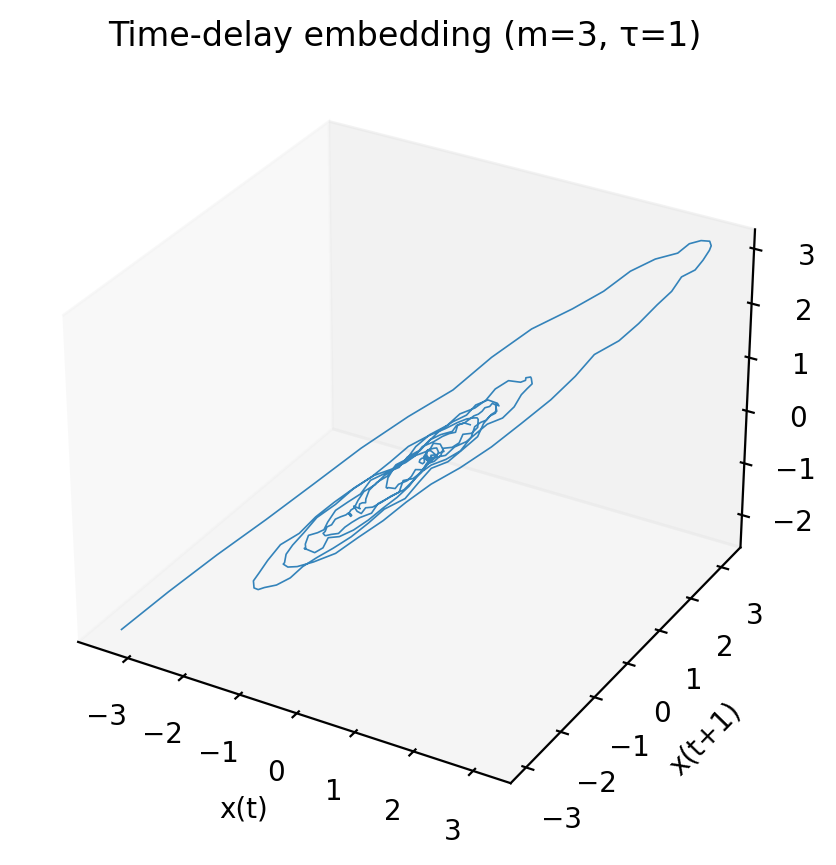

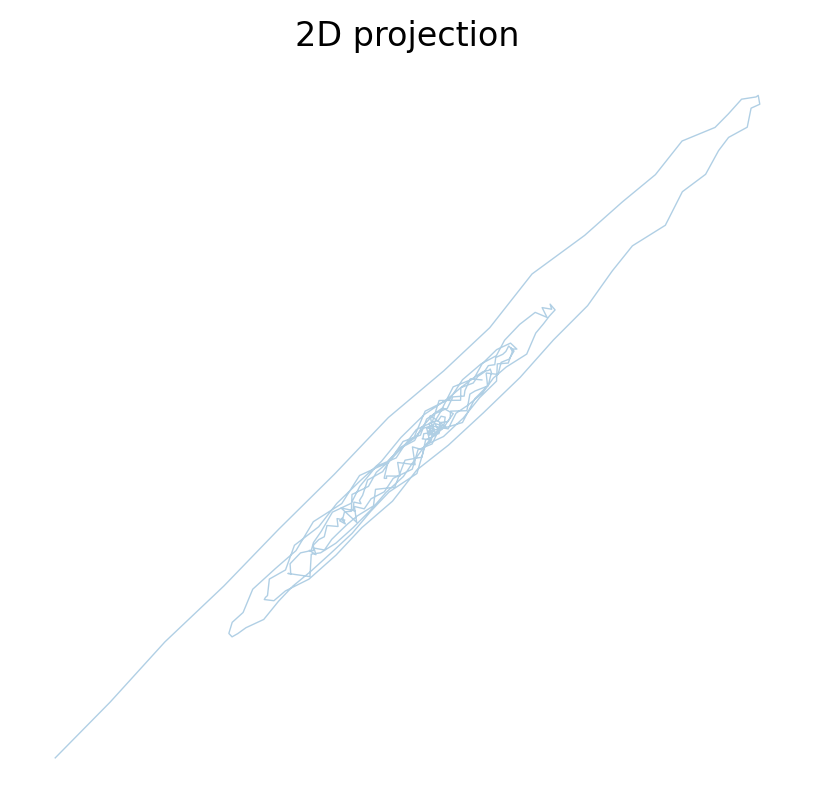

In [70]:
plot_phase_from_1d(y_pred, m=3, tau=1)
